In [4]:
import os
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import json
from classes import learn_class as lc
from importlib import reload
from classes import experiments as exp
import seaborn as sns
import random
sns.set_theme()
np.random.seed(0)
random.seed(0)
code_dir = r'C:\\Users\\theod\\PycharmProjects\\climate_policy_thesis\\climate_policy_RL'
proj_dir = r'C:\\Users\\theod\\Desktop\\UCL\\Machine Learning\\Project'

os.getcwd()

'C:\\Users\\theod\\PycharmProjects\\climate_policy_thesis\\climate_policy_RL'

# Agent plots

In [99]:
ppo = lc.Learn()
ppo.set_agent("PPO", pt_file_path=os.path.join(proj_dir, "models", "ppo_policy_net_3.0.pt"), second_path=os.path.join(proj_dir,"models", "ppo_critic_net_3.0.pt"))
buffer = ppo.sample_states(1000)
data = buffer.sample(1000)[2]
# plt.savefig(os.path.join(proj_dir, "overleaf images", "ppo features actor.png"), dpi=100, bbox_inches="tight")

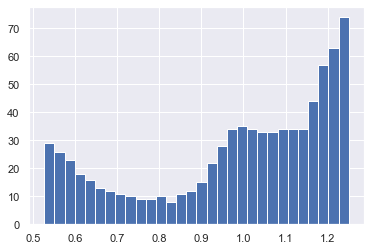

In [100]:
plt.hist(data, bins=30, range=(min(data), 1.25));

In [101]:
for n, data in enumerate(buffer.buffer):
    if data[0][2] == 0.5:
        print(n, data)
    if data[4]==True:
        print(n, data)

277 (array([0.01370731, 0.94994398, 0.99809173]), 3, 108.57588104980806, array([0.01352918, 0.9506391 , 0.99811925]), True)
420 (array([0.01383698, 0.94945417, 0.99807233]), 3, 109.20636691632927, array([0.01365722, 0.95015561, 0.99810013]), True)
421 (array([0.51027634, 0.50448832, 0.5       ]), 3, 0.52659202633463, array([0.51514015, 0.50282674, 0.50235399]), False)
853 (array([0.01375022, 0.94987584, 0.99808911]), 3, 106.48363859314496, array([0.01357137, 0.95057182, 0.99811666]), True)
854 (array([0.49236548, 0.51458941, 0.5       ]), 3, 0.5323698070760103, array([0.4983841 , 0.51329116, 0.50266738]), False)


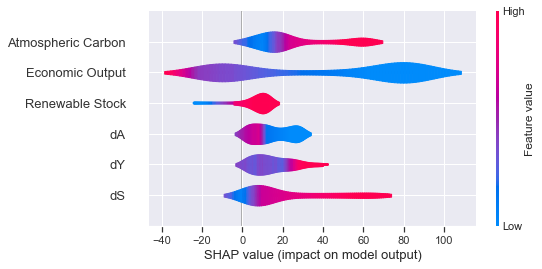

In [30]:
dqn = exp.Markov_Learn()
dqn.set_agent("DQN", pt_file_path=os.path.join(proj_dir, "models", "markov_dqn_target_net_1.pt"))
dqn.feature_plots(300, v=True)
# plt.savefig(os.path.join(proj_dir, "overleaf images", "dqn features.png"), dpi=100, bbox_inches="tight")

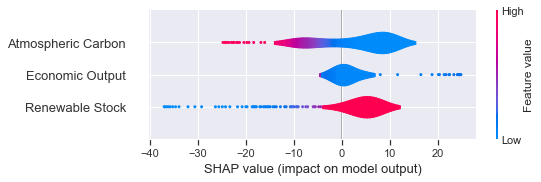

In [20]:
ddqn = lc.Learn()
ddqn.set_agent("DuelDDQN", pt_file_path=os.path.join(proj_dir, "models", "duelddqn_target_net_2.2.pt"))
ddqn.feature_plots(300, buffer=buffer)
# plt.savefig(os.path.join(proj_dir, "overleaf images", "ddqn features.png"), dpi=100, bbox_inches="tight")

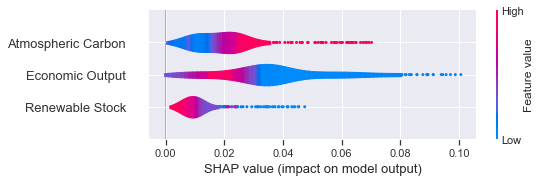

In [21]:
a2c = lc.Learn()
a2c.set_agent("A2C", pt_file_path=os.path.join(proj_dir, "models", "a2c_policy_net_0.pt"), second_path=os.path.join(proj_dir,"models", "a2c_critic_net_0.pt"))
#a2c.feature_plots(300, buffer=buffer, actor=True)
# plt.savefig(os.path.join(proj_dir, "overleaf images", "a2c features actor.png"), dpi=100, bbox_inches="tight")

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


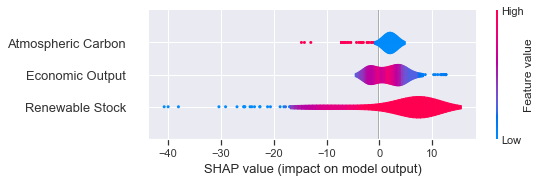

In [33]:
ddqn = lc.Learn()
ddqn.set_agent("DuelDDQN", pt_file_path=os.path.join(proj_dir, "models", "duelddqn_target_net_2.0.pt"))
buffer = ddqn.sample_states(1000)
ddqn.feature_plots(200, buffer=buffer)

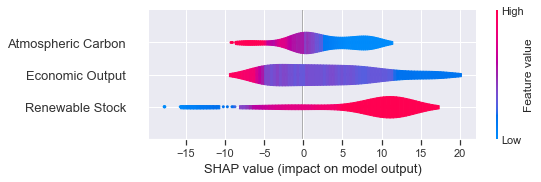

In [34]:
ddqn = lc.Learn()
ddqn.set_agent("DuelDDQN", pt_file_path=os.path.join(proj_dir, "models", "duelddqn_target_net_2.1.pt"))
ddqn.feature_plots(200, buffer=buffer)

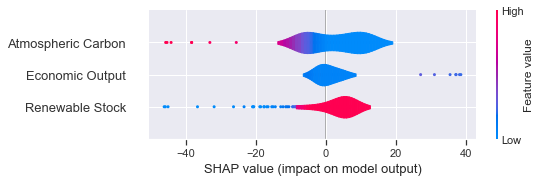

In [35]:
ddqn = lc.Learn()
ddqn.set_agent("DuelDDQN", pt_file_path=os.path.join(proj_dir, "models", "duelddqn_target_net_2.2.pt"))
ddqn.feature_plots(200, buffer=buffer)

# hyperparameter importance

In [113]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor
import time
import numpy as np
sweep_dir = os.path.join(proj_dir, "sweeps")

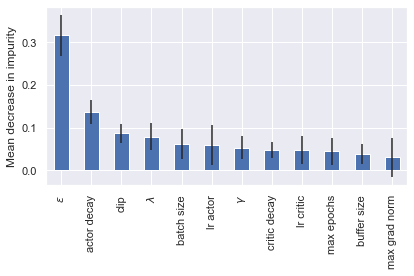

In [114]:
ppo = os.path.join(sweep_dir, "PPO sweep.csv")
dfppo = pd.read_csv(ppo)

X = dfppo[["epsilon", "discount", "buffer_size", "batch_size", "clip", "labda", "max_epochs", "max_grad_norm", "lr_actor", "lr_critic", "critic_decay", "actor_decay"]]
y = dfppo["mean_reward"]
data = dfppo[["epsilon", "discount", "buffer_size", "batch_size", "clip", "labda", "max_epochs", "max_grad_norm", "lr_actor", "lr_critic", "critic_decay", "actor_decay", "mean_reward"]]
feature_names = ["$\epsilon$", "$\gamma$", "buffer size", "batch size", "clip", "$\lambda$", "max epochs", "max grad norm", "lr actor", "lr critic", "critic decay", "actor decay"]
forest = ExtraTreesRegressor(n_estimators=100,
                             random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
#ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep ppo.png"), bbox_inches="tight", dpi=300)

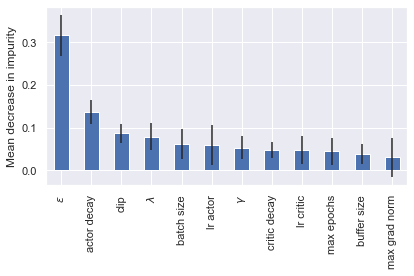

In [115]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
#ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep ppo.png"), bbox_inches="tight", dpi=300)

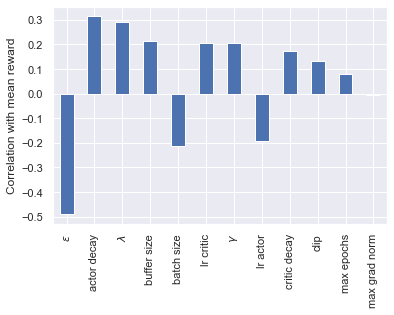

In [116]:
fig, ax = plt.subplots()
corrs = data.corr().mean_reward
corrs.index = feature_names + ["mean reward"]
corrs = corrs.sort_values(axis=0, ascending=False, key=lambda x: abs(x))[1:]
corrs.plot.bar(ax=ax)
ax.set_ylabel("Correlation with mean reward")
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep ppo corr.png"), bbox_inches="tight", dpi=300)

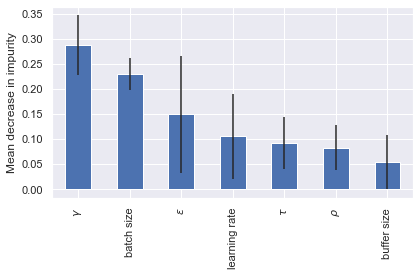

In [117]:
dqn = os.path.join(sweep_dir, "DQN sweeps.csv")
dqndf = pd.read_csv(dqn)
dqndf = dqndf[["batch_size","buffer_size","discount", "epsilon", "lr", "rho", "tau" , "mean_reward"]].dropna(axis=0)

X = dqndf[["batch_size","buffer_size","discount", "epsilon", "lr", "rho", "tau" ]]
y = dqndf["mean_reward"]
feature_names = ["batch size","buffer size", "$\gamma$","$\epsilon$", "learning rate", r"$\rho$", r"$\tau$" ]
forest = ExtraTreesRegressor(n_estimators=100, random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
#ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep dqn.png"), bbox_inches="tight", dpi=300)

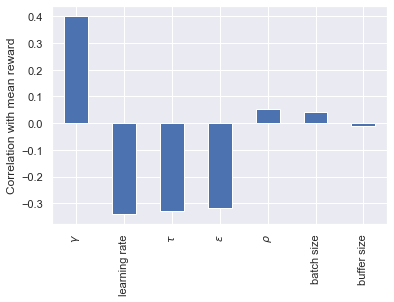

In [118]:
fig, ax = plt.subplots()
corrs = dqndf.corr().mean_reward
corrs.index = feature_names + ["mean rewards"]
corrs = corrs.sort_values(axis=0, ascending=False, key=lambda x: abs(x))[1:]
corrs.plot.bar(ax=ax)
ax.set_ylabel("Correlation with mean reward")
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep dqn corr.png"), bbox_inches="tight", dpi=300)

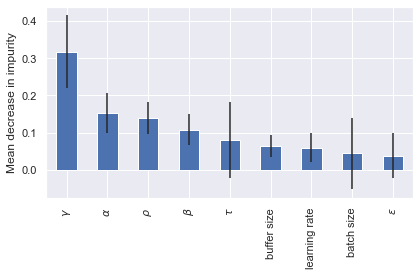

In [119]:
ddqn = os.path.join(sweep_dir, "DuelDDQN sweeps.csv")
ddqndf = pd.read_csv(ddqn)
ddqndf = ddqndf[["alpha","beta","batch_size","buffer_size","discount", "epsilon", "lr", "rho", "tau" , "mean_reward"]].dropna(axis=0)

X = ddqndf[["alpha","beta","batch_size","buffer_size","discount", "epsilon", "lr", "rho", "tau" ]]
y = ddqndf["mean_reward"]
feature_names = [r"$\alpha$",r"$\beta$","batch size","buffer size", "$\gamma$","$\epsilon$", "learning rate", r"$\rho$", r"$\tau$" ]
forest = ExtraTreesRegressor(n_estimators=100, random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
#ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep ddqn.png"), bbox_inches="tight", dpi=300)

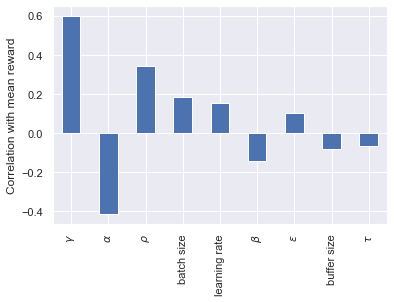

In [120]:
fig, ax = plt.subplots()
corrs = ddqndf.corr().mean_reward
corrs.index = feature_names + ["mean rewards"]
corrs = corrs.sort_values(axis=0, ascending=False, key=lambda x: abs(x))[1:]
corrs.plot.bar(ax=ax)
ax.set_ylabel("Correlation with mean reward")
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep ddqn corr.png"), bbox_inches="tight", dpi=300)

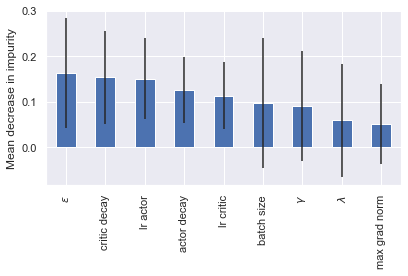

In [121]:
a2c = os.path.join(sweep_dir, "a2c sweeps.csv")
a2c = pd.read_csv(a2c)
a2c = a2c[["epsilon", "discount","batch_size",  "labda", "max_grad_norm", "lr_actor", "lr_critic", "critic_decay", "actor_decay", "mean_reward"]].dropna(axis=0)
X = a2c[["epsilon", "discount","batch_size",  "labda", "max_grad_norm", "lr_actor", "lr_critic", "critic_decay", "actor_decay"]]
y = a2c["mean_reward"]
feature_names = ["$\epsilon$", "$\gamma$", "batch size",  "$\lambda$", "max grad norm", "lr actor", "lr critic", "critic decay", "actor decay"]
forest = ExtraTreesRegressor(n_estimators=100, random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
#ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep a2c.png"), bbox_inches="tight", dpi=300)

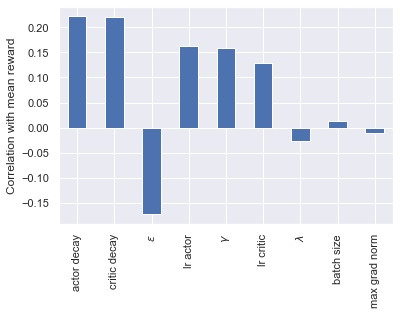

In [122]:
fig, ax = plt.subplots()
corrs = a2c.corr().mean_reward
corrs.index = feature_names + ["mean rewards"]
corrs = corrs.sort_values(axis=0, ascending=False, key=lambda x: abs(x))[1:]
corrs.plot.bar(ax=ax)
ax.set_ylabel("Correlation with mean reward")
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep a2c corr.png"), bbox_inches="tight", dpi=300)

# Big plots

In [4]:
with open(os.path.join(code_dir, "duelddqn_data.json"),"r") as f:
          ddqn_data = json.load(f)
with open(os.path.join(code_dir, "ppo_data.json"),"r") as f:
          ppo_data = json.load(f)
with open(os.path.join(code_dir, "dqn_data.json"),"r") as f:
          dqn_data = json.load(f)
# with open(os.path.join(code_dir, "a2c_data.json"),"r") as f:
#           a2c_data = json.load(f)
a2c_data = []
for i in range(3):
    a2c_data.append(np.load(os.path.join(proj_dir, "run_summaries", "seed {}".format(str(i)), "run_data.npy"), allow_pickle=True)[()])

In [5]:
def stack_data(agent_data, key="rewards"):
    all_data = agent_data.copy()
    max_length = max([len(data[key]) for data in all_data])
    array = np.zeros((len(all_data), max_length))
    for i, data in enumerate(all_data):
        data[key].extend([0] * (max_length-len(data[key])) )
        array[i] = data[key]
    return array

def stack_data_min(agent_data, key="rewards"):
    all_data = agent_data.copy()
    min_length = min([len(data[key]) for data in all_data])
    array = np.zeros((len(all_data), min_length))
    for i, data in enumerate(all_data):
        array[i] = data[key][:min_length]
    return array

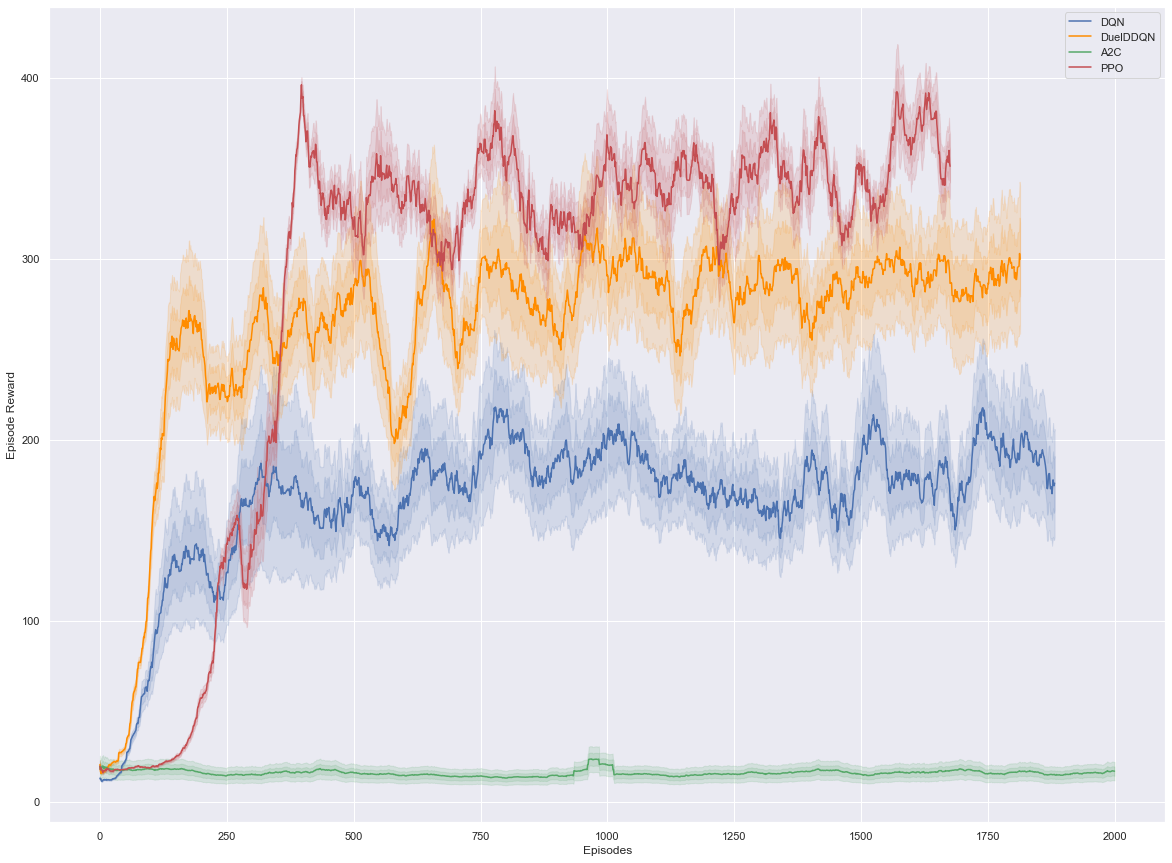

In [127]:
plt.figure(figsize=(20,15))

# dqn
dqn_mean = np.mean(stack_data_min(dqn_data, key="moving_avg_rewards"), axis=0)
dqn_std =  np.std(stack_data_min(dqn_data, key="moving_avg_rewards"), axis=0)
plt.plot(dqn_mean, label="DQN", c="b")
plt.fill_between(np.arange(len(dqn_mean)), dqn_mean - 0.3*dqn_std, dqn_mean+0.3*dqn_std, alpha=0.15, color="b") 
plt.fill_between(np.arange(len(dqn_mean)), dqn_mean - 0.15*dqn_std, dqn_mean+0.15*dqn_std, alpha=0.15, color="b") 


# ddqn
ddqn_mean = np.mean(stack_data_min(ddqn_data, key="moving_avg_rewards"), axis=0)
ddqn_std = np.std(stack_data_min(ddqn_data, key="moving_avg_rewards"), axis=0)
plt.plot(ddqn_mean, label="DuelDDQN", c="darkorange")
plt.fill_between(np.arange(len(ddqn_mean)), ddqn_mean - 0.3*ddqn_std, ddqn_mean+0.3*ddqn_std, alpha=0.15, color="darkorange") 
plt.fill_between(np.arange(len(ddqn_mean)), ddqn_mean - 0.15*ddqn_std, ddqn_mean+0.15*ddqn_std, alpha=0.15, color="darkorange") 

# a2c
a2c_mean = np.mean(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)[:2000]
a2c_std = np.mean(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)[:2000]
plt.plot(a2c_mean, label="A2C", c="g")
plt.fill_between(np.arange(len(a2c_mean)), a2c_mean - 0.3*a2c_std, a2c_mean+0.3*a2c_std, alpha=0.15, color="g") 
plt.fill_between(np.arange(len(a2c_mean)), a2c_mean - 0.15*a2c_std, a2c_mean+0.15*a2c_std, alpha=0.15, color="g") 

# ppo
ppo_mean = np.mean(stack_data_min(ppo_data, key="moving_avg_rewards"), axis=0)
ppo_std = np.std(stack_data_min(ppo_data, key="moving_avg_rewards"), axis=0)
plt.plot(ppo_mean, label="PPO", c="r")
plt.fill_between(np.arange(len(ppo_mean)), ppo_mean - 0.3*ppo_std, ppo_mean+0.3*ppo_std, alpha=0.15, color="r") 
plt.fill_between(np.arange(len(ppo_mean)), ppo_mean - 0.15*ppo_std, ppo_mean+0.15*ppo_std, alpha=0.15, color="r") 


plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Episode Reward");
plt.savefig(os.path.join(proj_dir, "overleaf images", "default plot2.png"), bbox_inches="tight", dpi=200)

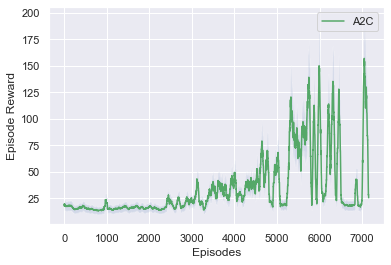

In [58]:
a2c_mean = np.mean(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)
a2c_std = np.mean(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)

plt.plot(a2c_mean, label="A2C", c="g")
plt.fill_between(np.arange(len(a2c_mean)), a2c_mean - 0.25*a2c_std, a2c_mean+0.25*a2c_std, alpha=0.15) 
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Episode Reward");
plt.savefig(os.path.join(proj_dir, "overleaf images", "a2cplot.png"), bbox_inches="tight")

In [67]:
ddqn_data[0]["final_point"].count("GREEN_FP")/dqn_data[0]["episodes"]

0.07863974495217853